In [1]:
print("start")

start


In [2]:
import os
import pickle
import numpy as np

In [3]:
os.listdir()

['.config', 'ko.bin', 'ko.tsv', 'sample_data']

In [4]:
import gensim

In [5]:
model = gensim.models.Word2Vec.load('ko.bin')

In [6]:
model.wv.vectors.shape

(30185, 200)

In [7]:
from sklearn.manifold import TSNE

In [8]:
!sudo apt-get install fonts-nanum*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 39 not upgraded.
Need to get 37.0 MB of archives.
After this operation, 145 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-eco all 1.000-6 [14.0 MB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-extra all 20170925-1 [12.2 MB]
Get:4 http://archive.ubu

In [9]:
!sudo fc-cache -fv

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [10]:
!ls -l /usr/share/fonts/truetype/

total 12
drwxr-xr-x 2 root root 4096 Jun 15 13:19 humor-sans
drwxr-xr-x 2 root root 4096 Jun 15 13:19 liberation
drwxr-xr-x 2 root root 4096 Jun 30 07:13 nanum


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


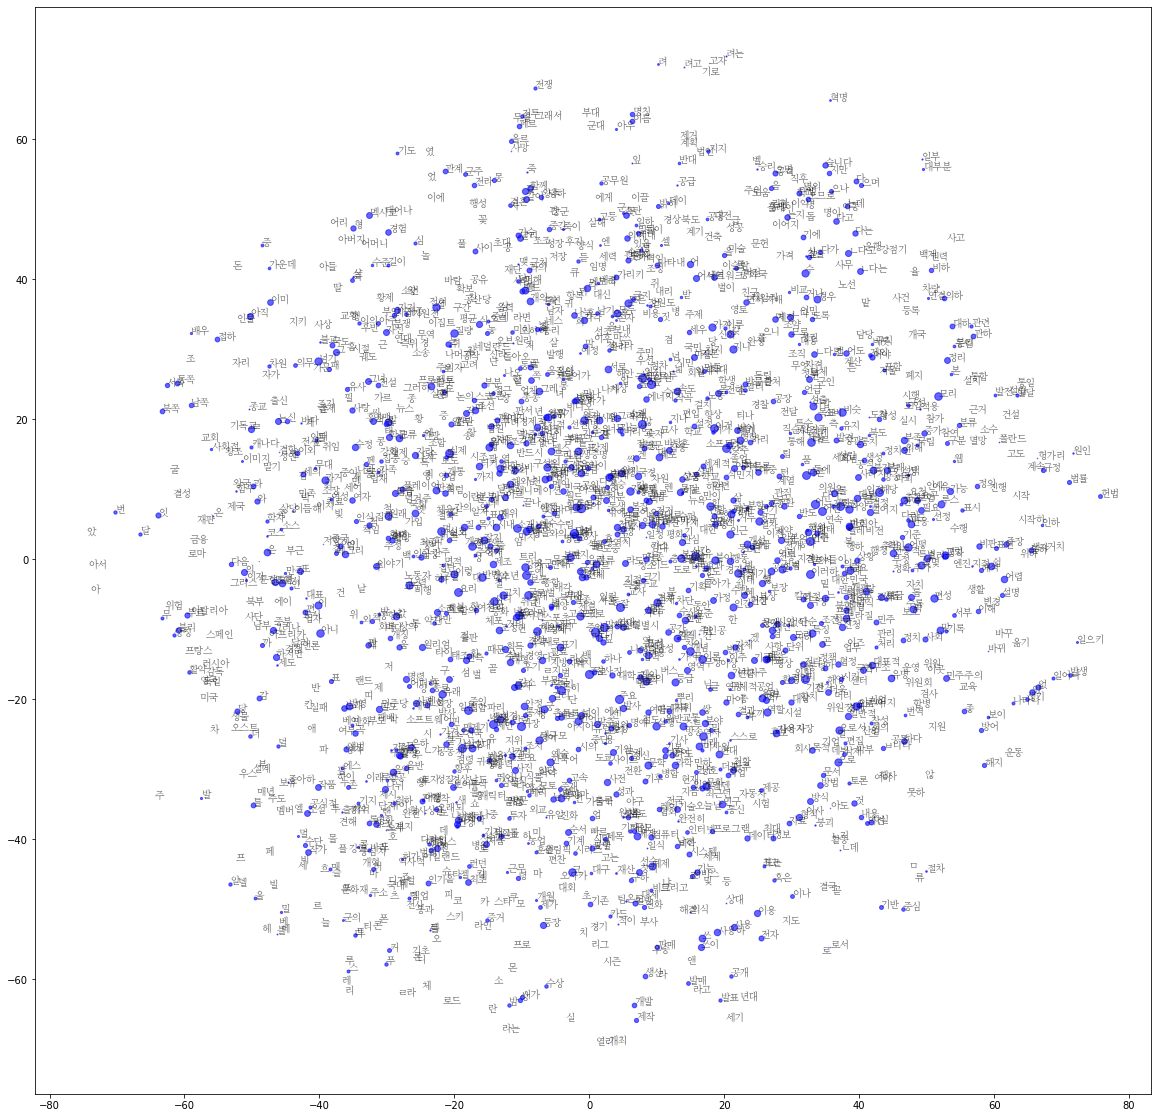

In [14]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.manifold import TSNE

path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)

viz_words = 2000
word_vector = np.concatenate((model.wv.vectors[:viz_words//2,:], model.wv.vectors[11489:11489+viz_words//2,:]), axis=0)
tsne = TSNE(n_components=3)
embed_tsne = tsne.fit_transform(word_vector)

fig, ax = plt.subplots(figsize=(20,20))
for i in range(viz_words):
    plt.scatter(*embed_tsne[i,:],alpha=0.6,color='b')
    plt.annotate(model.wv.index2word[i], (embed_tsne[i,0], embed_tsne[i,1]), alpha=0.6, fontsize=10, fontproperties=fontprop)
plt.savefig("seperate_15000_nolabel1.png")
plt.show()